In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [22]:
df= pd.read_csv('loan.csv')

In [23]:
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [27]:
df['term'] = df['term'].apply(lambda x: x.split(' ')[0])
df['term'] = df['term'].astype('int')
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [28]:
df.shape

(163987, 15)

In [29]:
df.dtypes

loan_amnt                  int64
term                       int32
int_rate                 float64
emp_length               float64
home_ownership            object
annual_inc               float64
purpose                   object
addr_state                object
dti                      float64
delinq_2yrs              float64
revol_util               float64
total_acc                float64
bad_loan                   int64
longest_credit_length    float64
verification_status       object
dtype: object

In [30]:
df = df.select_dtypes(exclude='object')
df

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
0,5000,36,10.65,10.0,24000.0,27.65,0.0,83.7,9.0,0,26.0
1,2500,60,15.27,0.0,30000.0,1.00,0.0,9.4,4.0,1,12.0
2,2400,36,15.96,10.0,12252.0,8.72,0.0,98.5,10.0,0,10.0
3,10000,36,13.49,10.0,49200.0,20.00,0.0,21.0,37.0,0,15.0
4,5000,36,7.90,3.0,36000.0,11.20,0.0,28.3,12.0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,60,12.39,3.0,45000.0,31.44,4.0,75.8,34.0,0,20.0
163983,20000,36,14.99,10.0,80000.0,23.65,0.0,68.8,18.0,0,22.0
163984,12825,36,17.14,6.0,38000.0,9.03,0.0,70.7,24.0,0,9.0
163985,27650,60,21.99,0.0,60000.0,10.10,1.0,61.2,20.0,0,6.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  int32  
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   annual_inc             163983 non-null  float64
 5   dti                    163987 non-null  float64
 6   delinq_2yrs            163958 non-null  float64
 7   revol_util             163794 non-null  float64
 8   total_acc              163958 non-null  float64
 9   bad_loan               163987 non-null  int64  
 10  longest_credit_length  163958 non-null  float64
dtypes: float64(8), int32(1), int64(2)
memory usage: 13.1 MB


In [32]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               5804
annual_inc                  4
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
dtype: int64

In [33]:
df['emp_length'].fillna(df['emp_length'].mean(),inplace=True)
df['annual_inc'].fillna(df['annual_inc'].mean(),inplace=True)
df['delinq_2yrs'].fillna(df['delinq_2yrs'].mean(),inplace=True)
df['revol_util'].fillna(df['revol_util'].mean(),inplace=True)
df['total_acc'].fillna(df['total_acc'].mean(),inplace=True)
df['longest_credit_length'].fillna(df['longest_credit_length'].mean(),inplace=True)

C:\Users\cheta\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [34]:
df.isna().sum()

loan_amnt                0
term                     0
int_rate                 0
emp_length               0
annual_inc               0
dti                      0
delinq_2yrs              0
revol_util               0
total_acc                0
bad_loan                 0
longest_credit_length    0
dtype: int64

In [35]:
df['bad_loan'].value_counts()

0    133971
1     30016
Name: bad_loan, dtype: int64

In [36]:
df['bad_loan'].value_counts(normalize=True)

0    0.816961
1    0.183039
Name: bad_loan, dtype: float64

<AxesSubplot:>

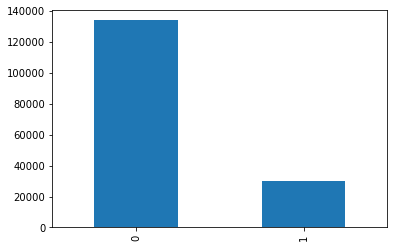

In [37]:
df['bad_loan'].value_counts().plot.bar()

<AxesSubplot:ylabel='bad_loan'>

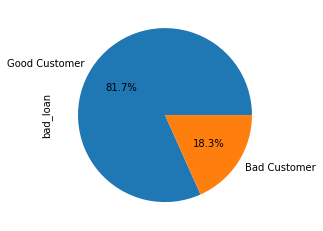

In [38]:
df['bad_loan'].value_counts().plot(kind='pie',labels=['Good Customer', 'Bad Customer'], autopct = '%1.1f%%')

In [39]:
x= df.drop('bad_loan',axis =1)
y = df['bad_loan']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
df['bad_loan'].value_counts()

0    133971
1     30016
Name: bad_loan, dtype: int64

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)

In [48]:
y_train.value_counts(normalize=True)

0    0.816959
1    0.183041
Name: bad_loan, dtype: float64

In [49]:
y_test.value_counts(normalize=True)

0    0.816971
1    0.183029
Name: bad_loan, dtype: float64

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_model = RandomForestClassifier(n_estimators=30, random_state=1)
rf_model = rf_model.fit(x_train,y_train)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
# tesing Accuracy
y_pred = rf_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is :', test_accuracy)

cnf_mat = confusion_matrix(y_test,y_pred)
print('Confusion Matrix :\n',cnf_mat)

clf_report = classification_report(y_test, y_pred)
print('Classification report :\n',clf_report)

Test Data Accuracy is : 0.8141654978962132
Confusion Matrix :
 [[26342   453]
 [ 5642   361]]
Classification report :
               precision    recall  f1-score   support

           0       0.82      0.98      0.90     26795
           1       0.44      0.06      0.11      6003

    accuracy                           0.81     32798
   macro avg       0.63      0.52      0.50     32798
weighted avg       0.75      0.81      0.75     32798



# Undersampling

In [55]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler

In [63]:
ns = NearMiss(0.5)
x_train_ns, y_train_ns = ns.fit_resample(x_train, y_train)
print(y_train.value_counts())
print(y_train_ns.value_counts())

C:\Users\cheta\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


0    107176
1     24013
Name: bad_loan, dtype: int64
0    48026
1    24013
Name: bad_loan, dtype: int64


In [64]:
rf_model = RandomForestClassifier(n_estimators=30, random_state=1)
rf_model = rf_model.fit(x_train_ns,y_train_ns)

In [65]:
# tesing Accuracy
y_pred = rf_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is :', test_accuracy)

cnf_mat = confusion_matrix(y_test,y_pred)
print('Confusion Matrix :\n',cnf_mat)

clf_report = classification_report(y_test, y_pred)
print('Classification report :\n',clf_report)

Test Data Accuracy is : 0.7242819684127081
Confusion Matrix :
 [[21741  5054]
 [ 3989  2014]]
Classification report :
               precision    recall  f1-score   support

           0       0.84      0.81      0.83     26795
           1       0.28      0.34      0.31      6003

    accuracy                           0.72     32798
   macro avg       0.56      0.57      0.57     32798
weighted avg       0.74      0.72      0.73     32798



In [70]:
ru = RandomUnderSampler(0.5)
x_train_ru, y_train_ru = ru.fit_resample(x_train, y_train)
print(y_train.value_counts())
print(y_train_ru.value_counts())

0    107176
1     24013
Name: bad_loan, dtype: int64
0    48026
1    24013
Name: bad_loan, dtype: int64


C:\Users\cheta\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [71]:
rf_model = RandomForestClassifier(n_estimators=30, random_state=1)
rf_model = rf_model.fit(x_train_ru,y_train_ru)

In [72]:
# tesing Accuracy
y_pred = rf_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is :', test_accuracy)

cnf_mat = confusion_matrix(y_test,y_pred)
print('Confusion Matrix :\n',cnf_mat)

clf_report = classification_report(y_test, y_pred)
print('Classification report :\n',clf_report)

Test Data Accuracy is : 0.7662052564180742
Confusion Matrix :
 [[23333  3462]
 [ 4206  1797]]
Classification report :
               precision    recall  f1-score   support

           0       0.85      0.87      0.86     26795
           1       0.34      0.30      0.32      6003

    accuracy                           0.77     32798
   macro avg       0.59      0.59      0.59     32798
weighted avg       0.75      0.77      0.76     32798



# Oversampling

In [73]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE

In [92]:
ro = RandomOverSampler()
x_train_ro, y_train_ro = ro.fit_resample(x_train, y_train)
print(y_train.value_counts())
print(y_train_ro.value_counts())

0    107176
1     24013
Name: bad_loan, dtype: int64
0    107176
1    107176
Name: bad_loan, dtype: int64


In [78]:
rf_model = RandomForestClassifier(n_estimators=30, random_state=1)
rf_model = rf_model.fit(x_train_ro,y_train_ro)

In [79]:
# tesing Accuracy
y_pred = rf_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is :', test_accuracy)

cnf_mat = confusion_matrix(y_test,y_pred)
print('Confusion Matrix :\n',cnf_mat)

clf_report = classification_report(y_test, y_pred)
print('Classification report :\n',clf_report)

Test Data Accuracy is : 0.8053234953350814
Confusion Matrix :
 [[25795  1000]
 [ 5385   618]]
Classification report :
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     26795
           1       0.38      0.10      0.16      6003

    accuracy                           0.81     32798
   macro avg       0.60      0.53      0.53     32798
weighted avg       0.75      0.81      0.76     32798



In [83]:
ad = ADASYN(0.6)
x_train_ad, y_train_ad = ad.fit_resample(x_train, y_train)
print(y_train.value_counts())
print(y_train_ad.value_counts())

C:\Users\cheta\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.6 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


0    107176
1     24013
Name: bad_loan, dtype: int64
0    107176
1     64323
Name: bad_loan, dtype: int64


In [84]:
rf_model = RandomForestClassifier(n_estimators=30, random_state=1)
rf_model = rf_model.fit(x_train_ad,y_train_ad)

In [85]:
# tesing Accuracy
y_pred = rf_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is :', test_accuracy)

cnf_mat = confusion_matrix(y_test,y_pred)
print('Confusion Matrix :\n',cnf_mat)

clf_report = classification_report(y_test, y_pred)
print('Classification report :\n',clf_report)

Test Data Accuracy is : 0.8012683700225623
Confusion Matrix :
 [[25598  1197]
 [ 5321   682]]
Classification report :
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     26795
           1       0.36      0.11      0.17      6003

    accuracy                           0.80     32798
   macro avg       0.60      0.53      0.53     32798
weighted avg       0.74      0.80      0.76     32798



In [89]:
sm = SMOTE(0.7)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
print(y_train.value_counts())
print(y_train_sm.value_counts())

C:\Users\cheta\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


0    107176
1     24013
Name: bad_loan, dtype: int64
0    107176
1     75023
Name: bad_loan, dtype: int64


In [90]:
rf_model = RandomForestClassifier(n_estimators=30, random_state=1)
rf_model = rf_model.fit(x_train_sm,y_train_sm)

In [91]:
# tesing Accuracy
y_pred = rf_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is :', test_accuracy)

cnf_mat = confusion_matrix(y_test,y_pred)
print('Confusion Matrix :\n',cnf_mat)

clf_report = classification_report(y_test, y_pred)
print('Classification report :\n',clf_report)

Test Data Accuracy is : 0.7988291969022502
Confusion Matrix :
 [[25435  1360]
 [ 5238   765]]
Classification report :
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     26795
           1       0.36      0.13      0.19      6003

    accuracy                           0.80     32798
   macro avg       0.59      0.54      0.54     32798
weighted avg       0.74      0.80      0.76     32798

